## what we will learn

- Regularization
- Underfitting and Overfitting
- bias variance 
- bias -variance tradeoff
- Cross Validation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Topics 

- Regularizations
    - ridge,lasso,ElasticNet
  
- Bias Variance
    -  overfitting, underfitting

- CrossValidations  

## Regularizations

Regularization is a technique used to reduce errors by fitting the function appropriately on the given training set and avoiding overfitting.

##### Role Of Regularization

In Python, Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, discouraging the model from assigning too much importance to individual features or coefficients.

1. Complexity Control: Regularization helps control model complexity by preventing overfitting to training data, resulting in better generalization to new data.
2. Preventing Overfitting: One way to prevent overfitting is to use regularization, which penalizes large coefficients and constrains their magnitudes, thereby preventing a model from becoming overly complex and memorizing the training data instead of learning its underlying patterns.
3. Balancing Bias and Variance: Regularization can help balance the trade-off between model bias (underfitting) and model variance (overfitting) in machine learning, which leads to improved performance.
4. Feature Selection: Some regularization methods, such as L1 regularization (Lasso), promote sparse solutions that drive some feature coefficients to zero. This automatically selects important features while excluding less important ones.
5. Handling Multicollinearity: When features are highly correlated (multicollinearity), regularization can stabilize the model by reducing coefficient sensitivity to small data changes.
6. Generalization: Regularized models learn underlying patterns of data for better generalization to new data, instead of memorizing specific examples.

- https://www.geeksforgeeks.org/regularization-in-machine-learning/ 
- https://www.geeksforgeeks.org/regularization-techniques-in-machine-learning/

### Lasso(L1) Ridge(L2) ElasticNet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('mpg')
df.drop("name", axis =1, inplace=True)
df
df.isna().sum()

df['horsepower'].median()

df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

df.info()

df.origin.unique()


df.origin.value_counts()

df['origin'] = df['origin'].map({"usa":1, "japan": 2, "europe": 3})

X = df.drop('mpg', axis =1)
y = df['mpg']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

X_train.shape, X_test.shape

from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model

regression_model.fit(X_train, y_train)


for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[i]}")

The coefficient for cylinders is -0.3176142302799369
The coefficient for displacement is 0.026237482599078946
The coefficient for horsepower is -0.018270764913124595
The coefficient for weight is -0.007487750398361897
The coefficient for acceleration is 0.0504067346197138
The coefficient for model_year is 0.8470951427061365
The coefficient for origin is 1.5190958387975024


In [4]:
from sklearn.metrics import r2_score
y_pred_linear = regression_model.predict(X_test)
r2_score(y_test, y_pred_linear)

0.8348001123742285

In [5]:
#ridge regression

from sklearn.linear_model import Ridge,LinearRegression

ridge_regression_model = Ridge(alpha=100)

ridge_regression_model.fit(X_train, y_train)

for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {ridge_regression_model.coef_[i]}")

The coefficient for cylinders is -0.10121103813475338
The coefficient for displacement is 0.01549704723498359
The coefficient for horsepower is -0.015154146537673992
The coefficient for weight is -0.0072516011271230064
The coefficient for acceleration is 0.030640385245588053
The coefficient for model_year is 0.7914981246881716
The coefficient for origin is 0.7240611102907413


In [6]:
from sklearn.metrics import r2_score
y_pred = ridge_regression_model.predict(X_test)
r2_score(y_test, y_pred)

0.8350365150570258

In [7]:
#lasso regression

from sklearn.linear_model import Lasso

lasso_regression_model = Lasso(alpha=0.5)

lasso_regression_model.fit(X_train, y_train)

for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {lasso_regression_model.coef_[i]}")

The coefficient for cylinders is -0.0
The coefficient for displacement is 0.006208198888300358
The coefficient for horsepower is -0.011058382987169565
The coefficient for weight is -0.0069826731680230885
The coefficient for acceleration is 0.0
The coefficient for model_year is 0.744654952003819
The coefficient for origin is 0.0


In [8]:
from sklearn.metrics import r2_score
y_pred = lasso_regression_model.predict(X_test)
r2_score(y_test, y_pred)

0.8277934716635555

# ElasticNet

In [9]:
from sklearn.linear_model import ElasticNet

In [10]:
elastic_regression_model = ElasticNet(alpha=0.8, l1_ratio=0.4)
elastic_regression_model.fit(X_train, y_train)
for i, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {elastic_regression_model.coef_[i]}")

The coefficient for cylinders is -0.0
The coefficient for displacement is 0.007991329781571462
The coefficient for horsepower is -0.013891824664720713
The coefficient for weight is -0.006988137750203173
The coefficient for acceleration is 0.0
The coefficient for model_year is 0.736838267738092
The coefficient for origin is 0.20426289739925593


In [11]:
from sklearn.metrics import r2_score
y_pred = elastic_regression_model.predict(X_test)
r2_score(y_test, y_pred)

0.8308672338152328

## Bias Variance

Bias is simply defined as the inability of the model because of that there is some difference or error occurring between the model’s predicted value and the actual value. These differences between actual or expected values and the predicted values are known as error or bias error or error due to bias. Bias is a systematic error that occurs due to wrong assumptions in the machine learning process. 

https://www.geeksforgeeks.org/bias-vs-variance-in-machine-learning/



![alt text](bias-and-variance-in-machine-learning.png)

![alt text](bias-and-variance-in-machine-learning2.png)

![alt text](bias-and-variance-in-machine-learning3.png)

![alt text](bias-and-variance-in-machine-learning4.png)

## bias variance code
- https://www.superannotate.com/blog/overfitting-and-underfitting-in-machine-learning
- https://www.javatpoint.com/bias-and-variance-in-machine-learning 
- https://spotintelligence.com/2023/04/11/bias-variance-trade-off/



Bias and variance are two core components that determine the performance of machine learning models, and they are critical for understanding the trade-offs involved in model selection and training. Understanding these concepts can help you evaluate model errors and improve model generalization. Let’s dive into the details of bias and variance, and then implement them using Python with an example.

### **1. Bias and Variance: The Key Concepts**

- **Bias**: It refers to the error introduced by approximating a real-world problem (which may be complex) by a simplified model. A high-bias model makes strong assumptions about the data and typically underfits. Underfitting means the model is too simplistic and cannot capture the underlying patterns in the data.
  
- **Variance**: It refers to the error introduced by the model’s sensitivity to small fluctuations in the training set. A high-variance model overfits, meaning it memorizes the training data and performs poorly on unseen data because it is too complex.
  
- **Bias-Variance Trade-off**: The goal is to strike a balance between bias and variance. A good model has low bias and low variance, but in practice, improving one tends to worsen the other. As you reduce bias (increasing model complexity), variance increases, and vice versa.

### **2. Error Decomposition:**

The generalization error of a model can be decomposed into three components:

- **Bias**: The error due to overly simplistic assumptions in the model.
- **Variance**: The error due to the model’s sensitivity to the training data.
- **Irreducible Error**: The noise in the data that cannot be reduced by any model.

\[
\text{Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}
\]

### **3. Example: Implementing Bias and Variance in Python**

Let’s use a simple dataset (e.g., synthetic data) and visualize how bias and variance behave with different model complexities.

#### **Step 1: Generate Synthetic Data**



#### **Step 2: Define Models with Different Complexity**

We’ll fit three models with different complexities:
- **Low Complexity**: Linear regression (high bias, low variance)
- **Medium Complexity**: Polynomial regression (low bias, medium variance)
- **High Complexity**: High-degree polynomial regression (low bias, high variance)

#### **Step 3: Visualizing the Bias-Variance Trade-off**

### **Conclusion**


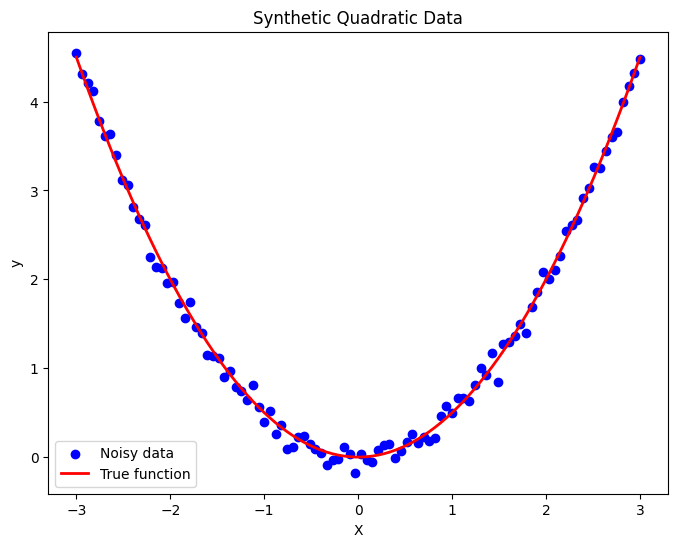

In [15]:
# Step 1: Generate Synthetic Data

import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)

# True quadratic function: y = 0.5 * x^2 + noise
X = np.linspace(-3, 3, 100)
y_true = 0.5 * X**2 + np.random.normal(0, 0.1, len(X))  # y = 0.5x^2 + noise

# Visualize the true data
plt.figure(figsize=(8,6))
plt.scatter(X, y_true, color='blue', label='Noisy data')
plt.plot(X, 0.5 * X**2, color='red', label='True function', linewidth=2)
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Quadratic Data')
plt.show()


In [16]:
# Step 2: Define Models with Different Complexity
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y_true, test_size=0.2, random_state=42)

# Linear regression (Low Complexity)
model_linear = LinearRegression()

# Polynomial regression (Medium Complexity)
degree_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

# High-degree polynomial regression (High Complexity)
degree_15 = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())

# Fit models
model_linear.fit(X_train, y_train)
degree_3.fit(X_train, y_train)
degree_15.fit(X_train, y_train)

# Predict and calculate errors
y_pred_linear = model_linear.predict(X_test)
y_pred_3 = degree_3.predict(X_test)
y_pred_15 = degree_15.predict(X_test)

# Compute Mean Squared Error
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_3 = mean_squared_error(y_test, y_pred_3)
mse_15 = mean_squared_error(y_test, y_pred_15)

print(f'Mean Squared Error (Linear): {mse_linear:.4f}')
print(f'Mean Squared Error (Degree 3): {mse_3:.4f}')
print(f'Mean Squared Error (Degree 15): {mse_15:.4f}')


Mean Squared Error (Linear): 1.6780
Mean Squared Error (Degree 3): 0.0060
Mean Squared Error (Degree 15): 0.0086


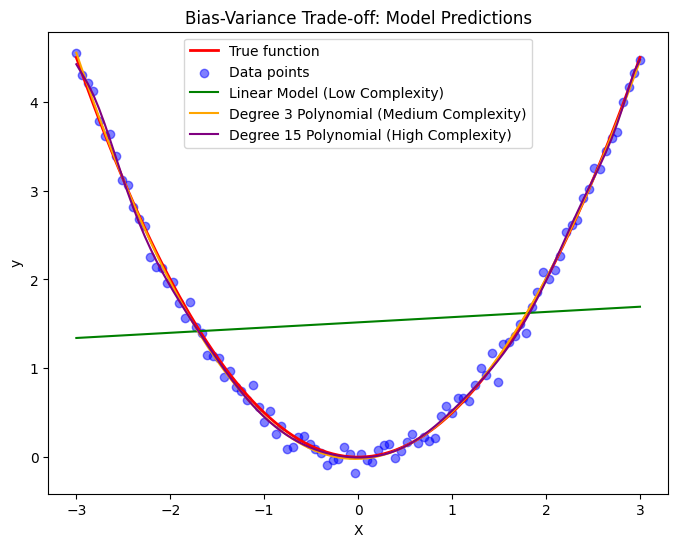

In [17]:
# Step 3: Visualizing the Bias-Variance Trade-off

# Plot predictions
plt.figure(figsize=(8,6))

# True function
plt.plot(X, 0.5 * X**2, color='red', label='True function', linewidth=2)

# Predictions
plt.scatter(X, y_true, color='blue', label='Data points', alpha=0.5)
plt.plot(X, model_linear.predict(X.reshape(-1, 1)), color='green', label='Linear Model (Low Complexity)')
plt.plot(X, degree_3.predict(X.reshape(-1, 1)), color='orange', label='Degree 3 Polynomial (Medium Complexity)')
plt.plot(X, degree_15.predict(X.reshape(-1, 1)), color='purple', label='Degree 15 Polynomial (High Complexity)')

# Add labels and title
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.title('Bias-Variance Trade-off: Model Predictions')
plt.show()

# 4. Interpreting Results

### **4. Interpreting Results**

- **Linear Model** (low complexity, high bias):
  - It underfits the data, and you can see that the model is a straight line which is far from the actual curve.
  - The **bias** is high, because the model assumes a linear relationship, but the data is quadratic.
  - The **variance** is low because the model doesn’t change much with different subsets of the data.

- **Degree 3 Polynomial** (medium complexity, balanced bias-variance):
  - This model fits the data better than the linear model, capturing the curvature.
  - It strikes a balance between bias and variance, with reasonable accuracy and generalization.

- **Degree 15 Polynomial** (high complexity, low bias):
  - This model overfits the data, following every fluctuation in the noisy data points.
  - It has **low bias** (almost perfect fit to the training data) but **high variance** (poor generalization to the test set).
  - This model likely has a very high **variance**, meaning small changes in the training data would result in big changes to the model.

### **5. Summary of Bias and Variance**

- **Low Bias, High Variance**: Complex models (like high-degree polynomials) often overfit, leading to high variance and low bias.
- **High Bias, Low Variance**: Simpler models (like linear regression) often underfit, leading to high bias and low variance.
- **Ideal Model**: A model that captures the underlying pattern (low bias) but also generalizes well to new data (low variance).

### **Conclusion**

Understanding and addressing the bias-variance trade-off is crucial for building effective machine learning models. By controlling the complexity of the model, we can strike a balance that minimizes both bias and variance, leading to a model that generalizes well to unseen data. In practice, cross-validation techniques are often used to estimate generalization error and choose the right model complexity.

## Crossvalidation
- https://www.geeksforgeeks.org/cross-validation-machine-learning/
- https://www.analyticsvidhya.com/blog/2021/05/4-ways-to-evaluate-your-machine-learning-model-cross-validation-techniques-with-python-code/

https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression#Cross-Validation-with-Linear-Regression

### 1. Hold Out method

This is the simplest evaluation method and is widely used in Machine Learning projects. Here the entire dataset(population) is divided into 2 sets – train set and test set. The data can be divided into 70-30 or 60-40, 75-25 or 80-20, or even 50-50 depending on the use case. As a rule, the proportion of training data has to be larger than the test data.
![alt text](<62390hold out_datavedas.jpg>)


### 2. Leave One Out Cross-Validation

In this method, we divide the data into train and test sets – but with a twist. Instead of dividing the data into 2 subsets, we select a single observation as test data, and everything else is labeled as training data and the model is trained. Now the 2nd observation is selected as test data and the model is trained on the remaining data.

![alt text](22483LOOCV-split-ISLR.png)

### 3. K-Fold Cross-Validation

In this resampling technique, the whole data is divided into k sets of almost equal sizes. The first set is selected as the test set and the model is trained on the remaining k-1 sets. The test error rate is then calculated after fitting the model to the test data.

In the second iteration, the 2nd set is selected as a test set and the remaining k-1 sets are used to train the data and the error is calculated. This process continues for all the k sets.

![alt text](47515k-fold.jpg)

### 4. Stratified K-Fold Cross-Validation

This is a slight variation from K-Fold Cross Validation, which uses ‘stratified sampling’ instead of ‘random sampling.’

Let’s quickly understand what stratified sampling is and how is it different from random sampling.

Suppose your data contains reviews for a cosmetic product used by both the male and female population. When we perform random sampling to split the data into train and test sets, there is a possibility that most of the data representing males is not represented in training data but might end up in test data. When we train the model on sample training data that is not a correct representation of the actual population, the model will not predict the test data with good accuracy.

This is where Stratified Sampling comes to the rescue. Here the data is split in such a way that it represents all the classes from the population.

Let’s consider the above example which has a cosmetic product review of 1000 customers out of which 60% is female and 40% is male. I want to split the data into train and test data in proportion (80:20). 80% of 1000 customers will be 800 which will be chosen in such a way that there are 480 reviews associated with the female population and 320 representing the male population. In a similar fashion, 20% of 1000 customers will be chosen for the test data ( with the same female and male representation).
![alt text](80190B9CCp.png)


In [ ]:
# 1. 
from sklearn.model_selection import train_test_split

X = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
X_train, X_test= train_test_split(X, test_size=0.3, random_state=1)
print('Train:', X_train, 'Test:', X_test)

Train: [50, 10, 40, 20, 80, 90, 60] Test: [30, 100, 70]


In [11]:
from sklearn.model_selection import LeaveOneOut
X = [10,20,30,40,50,60,70,80,90,100]

l = LeaveOneOut()

for train, test in l.split(X):

    print("%s %s"% (train,test))

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [13]:
print(l.split(X))

<generator object BaseCrossValidator.split at 0x0000021DF24728A0>


In [8]:
a="s"
print("hello",a)
print(f"hell0 {a}")
print("hello {}".format(a))
print("hello %s"%(a))

hello s
hell0 s
hello s
hello s


In [ ]:
# 3.k_fold
from sklearn.model_selection import KFold
X = ["a",'b','c','d','e','f']

kf = KFold(n_splits=4, shuffle=True, random_state=None)

for train, test in kf.split(X):

    # print("Train data",train,"Test data",test)
    print("Train data",[X[i] for i in train],"Test data",[X[i] for i in test])


Train data ['a', 'd', 'e', 'f'] Test data ['b', 'c']
Train data ['a', 'b', 'c', 'd'] Test data ['e', 'f']
Train data ['a', 'b', 'c', 'e', 'f'] Test data ['d']
Train data ['b', 'c', 'd', 'e', 'f'] Test data ['a']


In [21]:
# Quick implementation of Stratified K-Fold Cross-Validation in Python
import numpy as np
from sklearn.model_selection import StratifiedKFold
X = np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12]])
y= np.array([0,0,1,0,1,1])

skf = StratifiedKFold(n_splits=3,random_state=None,shuffle=False)

for train_index,test_index in skf.split(X,y):
    print("Train:",train_index,'Test:',test_index)
    X_train,X_test = X[train_index], X[test_index]
    y_train,y_test = y[train_index], y[test_index]

Train: [1 3 4 5] Test: [0 2]
Train: [0 2 3 5] Test: [1 4]
Train: [0 1 2 4] Test: [3 5]



## Next will learn  

- Gradient Descent
- Hyperparameter
- Logistic Regression
- Implementations of Cross Validation
